In [ ]:
import json
import os
import re
# drive à importer : https://drive.google.com/drive/folders/1vn_RM47LA_HdpQwZqdwqNRPm7CXyeeV3?usp=sharing
# 
#1 chargement des datas

#Nous allons tester la classification binaire 
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
from matplotlib import pyplot as plt
import seaborn as sn
from sklearn.metrics import confusion_matrix, classification_report
import numpy as np


In [ ]:
# Définit le chemin vers le dossier contenant les différentes types de datas

###WhisperX

#whisperX 
folder_path_whisperX_ad = "/content/drive/MyDrive/Alzheimer_transcripts/transcriptions/whisperX/ad"
folder_path_whisperX_cn = "/content/drive/MyDrive/Alzheimer_transcripts/transcriptions/whisperX/cn"

#whisperX with segmented 30sec audios length
folder_path_whisperX_ad_seg = "/content/drive/MyDrive/Alzheimer_transcripts/transcriptions/whisperX_seg/ad"
folder_path_whisperX_cn_seg = "/content/drive/MyDrive/Alzheimer_transcripts/transcriptions/whisperX_seg/cn"

#whisperX with segmented 30sec audios length and whistespaces representation 
folder_path_whisperX_ad_ws_seg = "/content/drive/MyDrive/Alzheimer_transcripts/transcriptions/whisperX_seg/white_spaces_ad"
folder_path_whisperX_cn_ws_seg = "/content/drive/MyDrive/Alzheimer_transcripts/transcriptions/whisperX_seg/white_spaces_cn"


#whisperX with whistespaces representation 
folder_path_whisperX_ad_ws = "/content/drive/MyDrive/Alzheimer_transcripts/transcriptions/whisperX/white_spaces_ad"
folder_path_whisperX_cn_ws = "/content/drive/MyDrive/Alzheimer_transcripts/transcriptions/whisperX/white_spaces_cn"



###Whisper classic
folder_path_whisper_ad = "/content/drive/MyDrive/Alzheimer_transcripts/transcriptions/whisper/ad"
folder_path_whisper_cn = "/content/drive/MyDrive/Alzheimer_transcripts/transcriptions/whisper/cn"

###Whisper classic with segmented 30sec audios length
folder_path_whisper_ad_seg = "/content/drive/MyDrive/Alzheimer_transcripts/transcriptions/whisper_seg/ad"
folder_path_whisper_cn_seg = "/content/drive/MyDrive/Alzheimer_transcripts/transcriptions/whisper_seg/cn"



#### Only debut of audio (index 0 of segmented)
folder_path_whisper_debut = "/content/drive/MyDrive/Alzheimer_transcripts/transcriptions/whisper_seg/debut"
folder_path_whisperX_debut = "/content/drive/MyDrive/Alzheimer_transcripts/transcriptions/whisperX_seg/debut"
folder_path_whisperX_ws_debut = "/content/drive/MyDrive/Alzheimer_transcripts/transcriptions/whisperX_seg/debut_white_spaces"
#creer dossier avec 


###Whisper 

###WhisperX

###
# # Liste tous les fichiers dans les 2 dossiers
# def list_files(folder_ad, folder_cn):
#   files = []
#   for data in [folder_ad, folder_cn]:
#       files.extend(os.listdir(data))    
#   return files   

# files_whisperX = list_files(folder_path_whisperX_ad, folder_path_whisperX_cn)
# print("taille whisperX files : ", len(files_whisperX))
# files_whisperX_seg = list_files(folder_path_whisperX_ad_seg, folder_path_whisperX_cn_seg)
# print("taille whisperX_seg files : ",len(files_whisperX_seg))
# files_whisperX_seg_ws = list_files(folder_path_whisperX_ad_ws_seg, folder_path_whisperX_cn_ws_seg)
# print("taille whisperX_seg_ws files : ",len(files_whisperX_seg_ws))
# files_whisperX_ws = list_files(folder_path_whisperX_ad_ws, folder_path_whisperX_cn_ws)
# print("taille whisperX_ws files : ",len(files_whisperX_ws))


# files_whisper = list_files(folder_path_whisper_ad, folder_path_whisper_cn)
# print("taille whisper files : ", len(files_whisper))
# files_whisper_seg = list_files(folder_path_whisper_ad_seg, folder_path_whisper_cn_seg)
# print("taille whisper_seg files : ", len(files_whisper_seg))

In [ ]:
def from_json_to_dict(folder_ad, folder_cn):
    data_ad = []
    data_cn = []
    for dir_path in [folder_ad, folder_cn]:
        for file_name in os.listdir(dir_path):
            if file_name.endswith('.json'):
                file_path = os.path.join(dir_path, file_name)
                with open(file_path, 'r') as f:
                    data = json.load(f)
                    if dir_path == folder_ad:
                        data_ad.append(data)
                    elif dir_path == folder_cn:
                        data_cn.append(data)
    return data_ad, data_cn             

                
whisperX_data_ad, whisperX_data_cn = from_json_to_dict(folder_path_whisperX_ad, folder_path_whisperX_cn)
whisperX_seg_data_ad, whisperX_seg_data_cn = from_json_to_dict(folder_path_whisperX_ad_seg, folder_path_whisperX_cn_seg)
whisperX_seg_ws_data_ad, whisperX_seg_ws_data_cn = from_json_to_dict(folder_path_whisperX_ad_ws_seg, folder_path_whisperX_cn_ws_seg)
whisperX_ws_data_ad, whisperX_ws_data_cn = from_json_to_dict(folder_path_whisperX_ad_ws, folder_path_whisperX_cn_ws)


whisper_seg_data_ad, whisper_seg_data_cn = from_json_to_dict(folder_path_whisper_ad_seg, folder_path_whisper_cn_seg)


In [ ]:
whisper_data_ad, whisper_data_cn = from_json_to_dict(folder_path_whisper_ad, folder_path_whisper_cn)

In [ ]:
def from_json_to_dict_debut(folder_debut):
  data_ad = []
  data_cn = []
  for file_name in os.listdir(folder_debut):
    if file_name.endswith('.json'):
        file_path = os.path.join(folder_debut, file_name)
        with open(file_path, 'r') as f:
          data = json.load(f)
          data_ad.append(data) if data["label"] else data_cn.append(data)
  return data_ad, data_cn

In [ ]:
whisper_debut_data_ad, whisper_debut_data_cn = from_json_to_dict_debut(folder_path_whisper_debut)

whisperX_debut_data_ad, whisperX_debut_data_cn = from_json_to_dict_debut(folder_path_whisperX_debut)
whisper_debut_ws_data_ad, whisper_debut_ws_data_cn = from_json_to_dict_debut(folder_path_whisperX_ws_debut)

In [ ]:
from random import choice

print("\nexemple d'une data ad avec whisperX :\n ", choice(whisperX_data_ad))
print("\nexemple d'une data cn avec whisperX :\n ", choice(whisperX_data_cn))

print("\nexemple d'une data ad avec whisperX_ws :\n ", choice(whisperX_ws_data_ad))


exemple d'une data ad avec whisperX :
  {'text': "And here's the picture. The kid's still turning over. She's trying to steal cookies out of the cookie jar. The little girl's reaching up to grab hers. The mother's doing the dishes but let the water run over all over the floor. And she's standing in the puddle. Thank you. Mm-hmm. Drying the dishes. Did I say that before? Yeah. Kids laughing. The other kid with the storm falling over. Break his neck. Mm-hmm. There's no action to the curtains and grass is growing out there I guess you could call that action. Leaves are probably glowing. Others in their own little world. Water's still running. Okay. He's scanning the map. Like he made them. The chair is falling over the stool. Okay. Good. I think the little kid kicked it and pushed him over. Okay. Instead of holding him up she gave a shove. Okay. Good.", 'label': 1}

exemple d'une data cn avec whisperX :
  {'text': "And then here on this one, tell me everything you see going on in this pi

In [ ]:
#delete des keys autre que 'text' et 'label'
keys_to_keep = ['text', 'label']

def delete_keys(d, keys_to_keep):
    for key in list(d.keys()):
        if key not in keys_to_keep:
            del d[key]

for data in (whisperX_data_ad + whisperX_data_cn + \
             whisperX_seg_data_ad + whisperX_seg_data_cn + \
             whisperX_seg_ws_data_ad + whisperX_seg_ws_data_cn +\
             whisperX_ws_data_ad + whisperX_ws_data_cn +\
             whisper_seg_data_ad + whisper_seg_data_cn +\
             whisper_data_ad + whisper_data_cn)+\
             whisper_debut_data_ad + whisper_debut_data_cn+\
             whisperX_debut_data_ad + whisperX_debut_data_cn+\
             whisper_debut_ws_data_ad + whisper_debut_ws_data_cn:
    delete_keys(data, keys_to_keep)
    

In [ ]:
### nous avons 6 types de données différentes, on leur attribue un numéros pour la lisibilité des variables:
# 0 : whisper
# 1 : whisper_seg

# 2 : whisperX
# 3 : whisperX_seg
# 4 : whisperX_seg_ws
# 5 : whisperX_ws

## à cela s'ajoute seulement les segments debut pour faire une comparaison (premier segment de 30 secondes)
# 6 : whisper debut 

# 7 : whisperX debut 
# 8 : whisperX_ws debut 
from sklearn.model_selection import train_test_split

data_0 = whisper_data_ad + whisper_data_cn
data_1 = whisper_seg_data_ad + whisper_seg_data_cn 
data_2 =whisperX_data_ad + whisperX_data_cn
data_3 = whisperX_seg_data_ad + whisperX_seg_data_cn
data_4 = whisperX_seg_ws_data_ad + whisperX_seg_ws_data_cn
data_5 = whisperX_ws_data_ad + whisperX_ws_data_cn

data_6 = whisper_debut_data_ad + whisper_debut_data_cn
data_7 = whisperX_debut_data_ad + whisperX_debut_data_cn
data_8 = whisper_debut_ws_data_ad + whisper_debut_ws_data_cn

texts_0, labels_0 = zip(*[(d['text'], d['label']) for d in data_0])
texts_1, labels_1 = zip(*[(d['text'], d['label']) for d in data_1])
texts_2, labels_2 = zip(*[(d['text'], d['label']) for d in data_2])
texts_3, labels_3 = zip(*[(d['text'], d['label']) for d in data_3])
texts_4, labels_4 = zip(*[(d['text'], d['label']) for d in data_4])
texts_5, labels_5 = zip(*[(d['text'], d['label']) for d in data_5])

texts_6, labels_6 = zip(*[(d['text'], d['label']) for d in data_6])
texts_7, labels_7 = zip(*[(d['text'], d['label']) for d in data_7])
texts_8, labels_8 = zip(*[(d['text'], d['label']) for d in data_8])

x_train_0, x_test_0, y_train_0, y_test_0 = train_test_split(texts_0, labels_0, test_size = 0.25, random_state = 0, stratify = labels_0)
x_train_1, x_test_1, y_train_1, y_test_1 = train_test_split(texts_1, labels_1, test_size = 0.25, random_state = 0, stratify = labels_1)
x_train_2, x_test_2, y_train_2, y_test_2 = train_test_split(texts_2, labels_2, test_size = 0.25, random_state = 0, stratify = labels_2)
x_train_3, x_test_3, y_train_3, y_test_3 = train_test_split(texts_3, labels_3, test_size = 0.25, random_state = 0, stratify = labels_3)
x_train_4, x_test_4, y_train_4, y_test_4 = train_test_split(texts_4, labels_4, test_size = 0.25, random_state = 0, stratify = labels_4)
x_train_5, x_test_5, y_train_5, y_test_5 = train_test_split(texts_5, labels_5, test_size = 0.25, random_state = 0, stratify = labels_5)

x_train_6, x_test_6, y_train_6, y_test_6 = train_test_split(texts_6, labels_6, test_size = 0.25, random_state = 0, stratify = labels_6)
x_train_7, x_test_7, y_train_7, y_test_7 = train_test_split(texts_7, labels_7, test_size = 0.25, random_state = 0, stratify = labels_7)
x_train_8, x_test_8, y_train_8, y_test_8 = train_test_split(texts_8, labels_8, test_size = 0.25, random_state = 0, stratify = labels_8)

In [ ]:
print(x_train_0[22])
print("\n")
print(x_train_1[22])
print("\n")
print(x_train_2[22])
print("\n")
print(x_train_3[22])

 What do you see going on here? Just look at this picture and tell me what you see going on. Well, you see the little boy stealing cookies. And the under girl is going to pick him up. I think she is. Because he is going to take a whole damn fall. And this girl... You have to find something here. Yeah, what else do you see? Well, cookie jars. They get smashed. But that little girl don't pick her up. And the woman is already getting it. Anything else? What's going on right here? What do you see going on over here? Anything? Yeah, she is in warm water and it's on all sides. And over there is cookies. Copyright. Is that all? Yeah, it's about all right. See? Okay.


 Here are two cups for coffee or something like that. Okay, thank you very much indeed.


What do you see going on here? Just look at this picture and tell me what you see going on. Well, you see the little boy stealing cookies. And the under girl is going to pick him up. I think she is. Because he is going to take a whole damn 

In [ ]:
#!pip install transformers
#!pip install tensorflow_hub
!pip install tensorflow_text
#from transformers import BertTokenizer, TFBertModel

import tensorflow as tf
import tensorflow_hub as hub
import tensorflow_text as text
#tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')
#bert_model = TFBertModel.from_pretrained("bert-base-uncased")
# bert_preprocess = hub.KerasLayer("https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3")
# bert_encoder = hub.KerasLayer("https://tfhub.dev/tensorflow/bert_en_uncased_L-12_H-768_A-12/4")

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
# # Bert layers
# text_input = tf.keras.layers.Input(shape=(), dtype=tf.string, name='text')
# preprocessed_text = bert_preprocess(text_input)
# outputs = bert_encoder(preprocessed_text)

# # Neural network layers
# l = tf.keras.layers.Dropout(0.01, name="dropout")(outputs['pooled_output'])
# l2 = tf.keras.layers.Dense(1, activation='sigmoid', name="output")(l)

# # Use inputs and outputs to construct a final model
# model = tf.keras.Model(inputs=[text_input], outputs = [l2])

def build_classifier_model():
  bert_preprocess = hub.KerasLayer("https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3", name='preprocessing')
  bert_encoder = hub.KerasLayer("https://tfhub.dev/tensorflow/bert_en_uncased_L-12_H-768_A-12/4", trainable=True, name='BERT_encoder')
  text_input = tf.keras.layers.Input(shape=(), dtype=tf.string, name='text')
  preprocessing_layer = bert_preprocess
  encoder_inputs = preprocessing_layer(text_input)
  encoder = bert_encoder
  outputs = encoder(encoder_inputs)
  net = outputs['pooled_output']
  
  net = tf.keras.layers.Dropout(0.1)(net)
  net = tf.keras.layers.Dense(1, activation="sigmoid", name='classifier')(net)
  return tf.keras.Model(text_input, net)

In [ ]:
#model_0 = build_classifier_model()
model_1 = build_classifier_model()
#model_2 = build_classifier_model()
#model_3 = build_classifier_model()
#model_4 = build_classifier_model()
#model_5 = build_classifier_model()
model_6 = build_classifier_model()
#model_5 = build_classifier_model()
model_1.summary()

In [ ]:
!pip install -q tf-models-official

from official.nlp import optimization

# loss = tf.keras.losses.BinaryCrossentropy(from_logits=True)
metrics = tf.metrics.BinaryAccuracy()

epochs = 10
steps_per_epoch = 200
num_train_steps = steps_per_epoch * epochs
num_warmup_steps = int(0.1*num_train_steps)
init_lr = 3e-5
# METRICS = [
#       tf.keras.metrics.Accuracy(name='accuracy'),
#       tf.keras.metrics.Precision(name='precision'),
#       tf.keras.metrics.Recall(name='recall')
# ]
optimizer = optimization.create_optimizer(init_lr=init_lr,
                                          num_train_steps=num_train_steps,
                                          num_warmup_steps=num_warmup_steps,
                                          optimizer_type='adamw')


In [ ]:
#training models 1
#model_1.reset_states()
#del model_1
model_0 = build_classifier_model()
model_0.compile(optimizer=optimizer,
              loss='binary_crossentropy',
              metrics=metrics)
model_0.fit(x_train_0, y_train_0, epochs=epochs)

Epoch 1/20
4/4 [==============================] - 29s 865ms/step - loss: 0.7204 - binary_accuracy: 0.4516
Epoch 2/20
4/4 [==============================] - 4s 913ms/step - loss: 0.7273 - binary_accuracy: 0.4758
Epoch 3/20
4/4 [==============================] - 4s 853ms/step - loss: 0.6975 - binary_accuracy: 0.5484
Epoch 4/20
4/4 [==============================] - 3s 861ms/step - loss: 0.7044 - binary_accuracy: 0.4839
Epoch 5/20
4/4 [==============================] - 4s 921ms/step - loss: 0.6838 - binary_accuracy: 0.5403
Epoch 6/20
4/4 [==============================] - 4s 879ms/step - loss: 0.6974 - binary_accuracy: 0.5161
Epoch 7/20
4/4 [==============================] - 4s 871ms/step - loss: 0.6651 - binary_accuracy: 0.6129
Epoch 8/20
4/4 [==============================] - 4s 921ms/step - loss: 0.6419 - binary_accuracy: 0.6694
Epoch 9/20
4/4 [==============================] - 4s 937ms/step - loss: 0.6254 - binary_accuracy: 0.7097
Epoch 10/20
4/4 [==============================] - 4s 

In [ ]:
#train avec tout test avec tout
model_0.evaluate(x_test_0, y_test_0)


2/2 [==============================] - 2s 107ms/step - loss: 0.6160 - binary_accuracy: 0.7143


[0.615959882736206, 0.7142857313156128]

In [ ]:
#train avec tout test avec debut
model_0.evaluate(x_test_6, y_test_6)

2/2 [==============================] - 0s 107ms/step - loss: 0.4587 - binary_accuracy: 0.7619


[0.45868268609046936, 0.761904776096344]

In [ ]:
def get_matrice_cm(model, x_test, y_test ):
  y_predicted = model.predict(x_test)
  y_predicted = np.round(y_predicted).flatten()
  cm = confusion_matrix(y_test, y_predicted)
  return cm

def plot_2_cm(cm1, cm2, title1, title2):
  # Créer une grille de subplots pour afficher les matrices de confusion
  fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(20, 4))

  # Afficher chaque matrice de confusion dans un subplot différent
  sn.heatmap(cm1, ax=axes[0], annot=True, cmap="Blues", fmt='g')
  sn.heatmap(cm2, ax=axes[1], annot=True, cmap="Blues", fmt='g')
  # sn.heatmap(cm_4, ax=axes[2], annot=True, cmap="Blues", fmt='g')

  axes[0].set_xlabel('Prédiction')
  axes[0].set_ylabel('Réel')
  axes[0].set_title(title1)

  axes[1].set_xlabel('Prédiction')
  axes[1].set_ylabel('Réel')
  axes[1].set_title(title2)


In [ ]:
cm_1 = get_matrice_cm(model_0, x_test_0, y_test_0)
cm_1_b = get_matrice_cm(model_0, x_test_6, y_test_6)

Text(0.5, 1.0, 'Matrice de confusion modele_1 : données de whisper avec test sur whisper_debut')

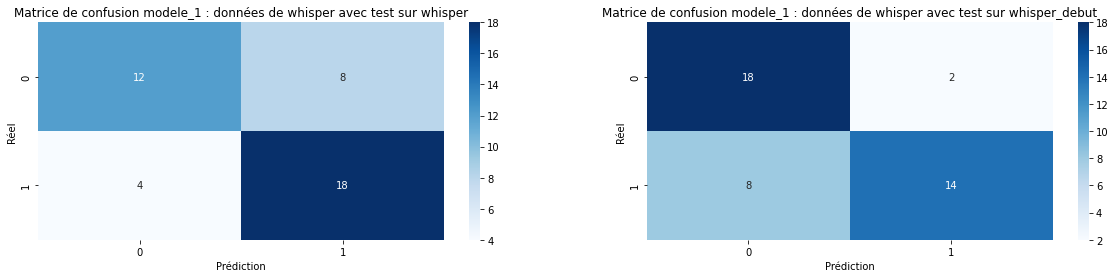

In [ ]:
# # Créer une grille de subplots pour afficher les matrices de confusion
# fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(20, 4))

# # Afficher chaque matrice de confusion dans un subplot différent
# sn.heatmap(cm_1, ax=axes[0], annot=True, cmap="Blues", fmt='g')
# sn.heatmap(cm_1_b, ax=axes[1], annot=True, cmap="Blues", fmt='g')
# # sn.heatmap(cm_4, ax=axes[2], annot=True, cmap="Blues", fmt='g')

# axes[0].set_xlabel('Prédiction')
# axes[0].set_ylabel('Réel')
# axes[0].set_title('Matrice de confusion modele_1 : données de whisper avec test sur whisper')

# axes[1].set_xlabel('Prédiction')
# axes[1].set_ylabel('Réel')
# axes[1].set_title('Matrice de confusion modele_1 : données de whisper avec test sur whisper_debut')

plot_2_cm(cm_1, cm_1_b, 'Matrice de confusion modele_1 : données de whisper avec test sur whisper', 'Matrice de confusion modele_1 : données de whisper avec test sur whisper_debut')

In [ ]:
#training models 1 mais avec les données de seg_debut
model_1.reset_states()
del model_1

model_1_bis = build_classifier_model()
model_1_bis.compile(optimizer=optimizer,
              loss='binary_crossentropy',
              metrics=metrics)
model_1_bis.fit(x_train_6, y_train_6, epochs=epochs)

Epoch 1/20
4/4 [==============================] - 23s 900ms/step - loss: 0.7108 - binary_accuracy: 0.5542
Epoch 2/20
4/4 [==============================] - 3s 868ms/step - loss: 0.6829 - binary_accuracy: 0.5000
Epoch 3/20
4/4 [==============================] - 4s 872ms/step - loss: 0.6295 - binary_accuracy: 0.6613
Epoch 4/20
4/4 [==============================] - 4s 906ms/step - loss: 0.5724 - binary_accuracy: 0.7742
Epoch 5/20
4/4 [==============================] - 4s 928ms/step - loss: 0.5049 - binary_accuracy: 0.8306
Epoch 6/20
4/4 [==============================] - 4s 917ms/step - loss: 0.4369 - binary_accuracy: 0.8629
Epoch 7/20
4/4 [==============================] - 3s 867ms/step - loss: 0.3534 - binary_accuracy: 0.8710
Epoch 8/20
4/4 [==============================] - 4s 921ms/step - loss: 0.2718 - binary_accuracy: 0.9274
Epoch 9/20
4/4 [==============================] - 4s 855ms/step - loss: 0.2143 - binary_accuracy: 0.9597
Epoch 10/20
4/4 [==============================] - 3s 

In [ ]:
#train avec début test avec tout
cm_2 = get_matrice_cm(model_1_bis, x_test_0, y_test_0)
model_1_bis.evaluate(x_test_0, y_test_0)

2/2 [==============================] - 1s 105ms/step - loss: 0.4390 - binary_accuracy: 0.9048


[0.4390411376953125, 0.9047619104385376]

In [ ]:
#train avec début et test avec début
cm_2_bis = get_matrice_cm(model_1_bis, x_test_6, y_test_6)
model_1_bis.evaluate(x_test_6, y_test_6)

2/2 [==============================] - 0s 103ms/step - loss: 0.8104 - binary_accuracy: 0.7857


[0.8103622198104858, 0.7857142686843872]

Text(0.5, 1.0, 'Matrice de confusion modele_1_bis : train avec données de whisper_debut avec test sur whisper_debut')

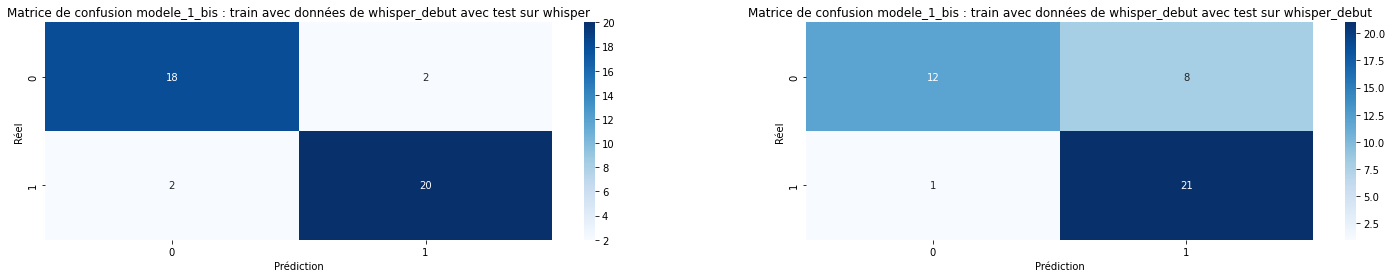

In [ ]:
# Créer une grille de subplots pour afficher les matrices de confusion
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(25, 4))

# Afficher chaque matrice de confusion dans un subplot différent
sn.heatmap(cm_2, ax=axes[0], annot=True, cmap="Blues", fmt='g')
sn.heatmap(cm_2_bis, ax=axes[1], annot=True, cmap="Blues", fmt='g')
# sn.heatmap(cm_4, ax=axes[2], annot=True, cmap="Blues", fmt='g')

axes[0].set_xlabel('Prédiction')
axes[0].set_ylabel('Réel')
axes[0].set_title('Matrice de confusion modele_1_bis : train avec données de whisper_debut avec test sur whisper')

axes[1].set_xlabel('Prédiction')
axes[1].set_ylabel('Réel')
axes[1].set_title('Matrice de confusion modele_1_bis : train avec données de whisper_debut avec test sur whisper_debut')

In [ ]:
#ici
###same avec whisperX

#training models 2 mais avec les données de seg_debut
model_2 = build_classifier_model()
model_2.compile(optimizer=optimizer,
              loss='binary_crossentropy',
              metrics=metrics)
model_2.fit(x_train_2, y_train_2, epochs=epochs)

Epoch 1/20
4/4 [==============================] - 24s 910ms/step - loss: 0.7665 - binary_accuracy: 0.5242
Epoch 2/20
4/4 [==============================] - 4s 875ms/step - loss: 0.7672 - binary_accuracy: 0.5242
Epoch 3/20
4/4 [==============================] - 4s 875ms/step - loss: 0.7721 - binary_accuracy: 0.5242
Epoch 4/20
4/4 [==============================] - 4s 907ms/step - loss: 0.7292 - binary_accuracy: 0.5403
Epoch 5/20
4/4 [==============================] - 4s 943ms/step - loss: 0.7244 - binary_accuracy: 0.5565
Epoch 6/20
4/4 [==============================] - 4s 886ms/step - loss: 0.7222 - binary_accuracy: 0.5242
Epoch 7/20
4/4 [==============================] - 4s 891ms/step - loss: 0.6616 - binary_accuracy: 0.5645
Epoch 8/20
4/4 [==============================] - 4s 926ms/step - loss: 0.6687 - binary_accuracy: 0.5806
Epoch 9/20
4/4 [==============================] - 4s 935ms/step - loss: 0.6581 - binary_accuracy: 0.6048
Epoch 10/20
4/4 [==============================] - 4s 

In [ ]:
#train avec tout test avec tout
cm_3 = get_matrice_cm(model_2, x_test_2, y_test_2)
model_2.evaluate(x_test_2, y_test_2)


2/2 [==============================] - 1s 105ms/step - loss: 0.5470 - binary_accuracy: 0.7381


[0.5470249652862549, 0.738095223903656]

In [ ]:
#train avec tout test avec debut
cm_3_bis = get_matrice_cm(model_2, x_test_7, y_test_7)
model_2.evaluate(x_test_7, y_test_7)

2/2 [==============================] - 1s 114ms/step - loss: 0.5715 - binary_accuracy: 0.6905


[0.5715210437774658, 0.6904761791229248]

Text(0.5, 1.0, 'Matrice de confusion modele_2_bis : train avec données de whisperX avec test sur whisperX_debut')

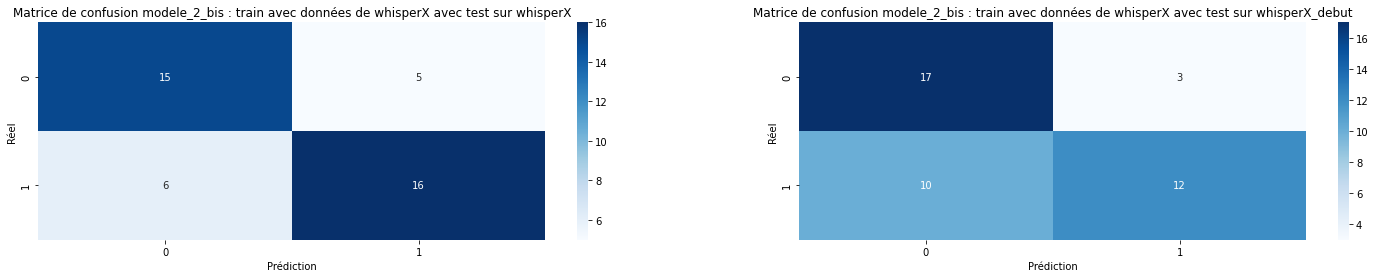

In [ ]:
# Créer une grille de subplots pour afficher les matrices de confusion
# fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(25, 4))

# # Afficher chaque matrice de confusion dans un subplot différent
# sn.heatmap(cm_3, ax=axes[0], annot=True, cmap="Blues", fmt='g')
# sn.heatmap(cm_3_bis, ax=axes[1], annot=True, cmap="Blues", fmt='g')
# # sn.heatmap(cm_4, ax=axes[2], annot=True, cmap="Blues", fmt='g')

# axes[0].set_xlabel('Prédiction')
# axes[0].set_ylabel('Réel')
# axes[0].set_title('Matrice de confusion modele_2_bis : train avec données de whisperX avec test sur whisperX')

# axes[1].set_xlabel('Prédiction')
# axes[1].set_ylabel('Réel')
# axes[1].set_title('Matrice de confusion modele_2_bis : train avec données de whisperX avec test sur whisperX_debut')

plot_2_cm(cm_3, cm_3_bis, 'Matrice de confusion modele_2_bis : train avec données de whisperX avec test sur whisperX', 'Matrice de confusion modele_2_bis : train avec données de whisperX avec test sur whisperX_debut')

In [ ]:
#train avec whisperX_debut

model_7 = build_classifier_model()
model_7.compile(optimizer=optimizer,
              loss='binary_crossentropy',
              metrics=metrics)
model_7.fit(x_train_7, y_train_7, epochs=20)

Instructions for updating:
Lambda fuctions will be no more assumed to be used in the statement where they are used, or at least in the same block. https://github.com/tensorflow/tensorflow/issues/56089


Epoch 1/20
4/4 [==============================] - 252s 56s/step - loss: 0.6967 - binary_accuracy: 0.5000
Epoch 2/20
4/4 [==============================] - 213s 53s/step - loss: 0.6746 - binary_accuracy: 0.5726
Epoch 3/20
4/4 [==============================] - 215s 53s/step - loss: 0.6955 - binary_accuracy: 0.5403
Epoch 4/20
4/4 [==============================] - 211s 52s/step - loss: 0.7127 - binary_accuracy: 0.5161
Epoch 5/20
4/4 [==============================] - 211s 52s/step - loss: 0.6702 - binary_accuracy: 0.6048
Epoch 6/20
4/4 [==============================] - 211s 52s/step - loss: 0.6534 - binary_accuracy: 0.7097
Epoch 7/20
4/4 [==============================] - 210s 52s/step - loss: 0.6491 - binary_accuracy: 0.6532
Epoch 8/20
4/4 [==============================] - 215s 54s/step - loss: 0.6389 - binary_accuracy: 0.6290
Epoch 9/20
4/4 [==============================] - 212s 52s/step - loss: 0.5966 - binary_accuracy: 0.6694
Epoch 10/20
4/4 [==============================] - 214s

In [ ]:
#test avec debut_7
cm_7 = get_matrice_cm(model_7, x_test_7, y_test_7)
model_7.evaluate(x_test_7, y_test_7)

2/2 [==============================] - 23s 7s/step - loss: 0.6074 - binary_accuracy: 0.6905


[0.6073777079582214, 0.6904761791229248]

In [ ]:
cm_7_bis = get_matrice_cm(model_7, x_test_2, y_test_2)
model_7.evaluate(x_test_2, y_test_2)


2/2 [==============================] - 24s 7s/step - loss: 0.3550 - binary_accuracy: 0.8571


[0.35501670837402344, 0.8571428656578064]

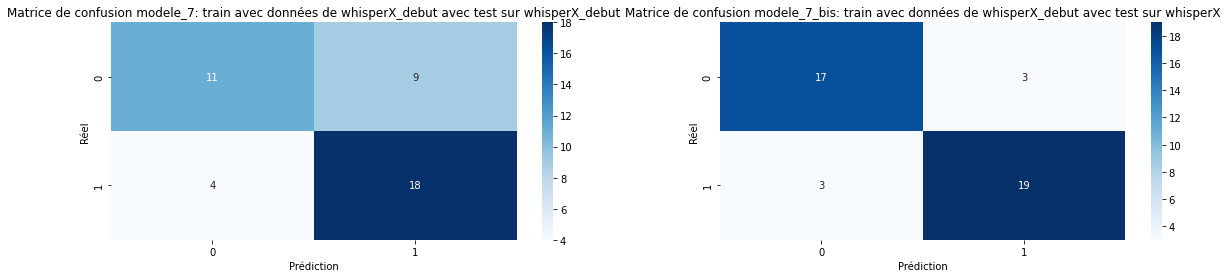

In [ ]:
plot_2_cm(cm_7, cm_7_bis, 'Matrice de confusion modele_7: train avec données de whisperX_debut avec test sur whisperX_debut'\
          , 'Matrice de confusion modele_7_bis: train avec données de whisperX_debut avec test sur whisperX')
